# Les Réseaux de neurones convolutifs - (CNN) Classification d'images 

## Reconnaissance de chiffres manuscrits

Nous utiliserons, pour commencer, le Dataset MNIST fournis par Keras <br>
( Dataset d’images de chiffres tracés à la main en 28×28 pixels )

Nous allons entraîner trois IA différentes, puis les comparer

    Ce TP est réalisé avec le Framework Keras, utilisant TensorFlow en Backend
    (Keras simplifie les commandes et ajoute quelques fonctionnalitées)

### A) Organisation des Codes et Dossiers

- <strong>data_examples</strong> : Repertoire contenant des exemples d'images de database MNIST<br>Il sera possible d'en télécharger d'autres pour explorer l'apprentissage de nos IA
<br><br>
- <strong>drawings</strong> : Repertoire où sont stockés des chiffres tracés à la main pour tester les algorithmes avec une écriture réelle
<br><br>
- <strong>save_models</strong> : Repertoire de sauvegarde des modèles déjà entrainés.<br> Permet de ne pas avoir à entrainer les IA à chaque session
<br><br>
- <strong>cnnutils</strong> : Fichier <em>Python</em> contenant une Bibliothèque de fonctions dont nous aurons besoin dans tous nos projet de DeepLearning
<br><br>
- <strong>preparedata</strong> : Fichier <em>Python</em> où sont regroupés les operations de récupération et de préparation de nos données d'apprentissage
<br><br>
- <strong>small_cnn_tutorial_keras</strong> : Fichier <em>Python</em> contenant le premier CNN implémenté.<br> Le plus simple des trois
<br><br>
- <strong>medium_cnn_tutorial_keras</strong> : Fichier <em>Python</em> contenant le second CNN implémenté.<br> Ajout du pooling et du dropout
<br><br>
- <strong>large_cnn_tutorial_keras</strong> : Fichier <em>Python</em> contenant le troisième CNN implémenté<br> Plus complexe
<br><br>

### B) Preparation des fichiers Python

#### Nous allons créer le fichier <strong>preparedata.py</strong>
Occupons nous d'abord des imports :
- Nous aurons besoin de Numpy pour manipuler les vecteurs et interagir avec Keras
- Nous aurons besoin de Keras ou du moins d'une partie de Keras :
    - Le dataset fournis par Keras : MNIST
    - Quelques utilitaires qui nous permettrons de manipuler les données
    - Et le Backend afin de le parametrer selon nos besoins

Ce qui nous donne : 

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering('th')

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

Using TensorFlow backend.


La fonction " <em>set_image_dim_ordering</em> " nous permet de spécifier le format des couches du modèle.<br>
<br>
" <em>th</em> " signifie que les kernels des convolutions auront pour format (depth, input_depth, rows, cols)<br>
à l'inverse " <em>tf</em> " leur imposerait ce format : (rows, cols, input_depth, depth).<br>
En clair ça donne ça : (nombre d’entrées, nombre de channels, largeur d’une entrée, hauteur d’une entrée)

<br>
Keras pouvant utiliser Theanos ou Tensorflow, il est utile de pouvoir partager les tenseurs entre ces deux backends. <br>
Hors ils n'utilisent pas naturellement la même convention.<br>
<br>
Le choix de l'un ou de l'autre n'a aucune importance sur les performances.<br>
Mais si les conventions diffèrent entre notre backend et nos tenseurs nous allons obtenir des messages d'erreur bloquants.
<br>
<br>
Enfin, forcer le random de numpy se fait courament <strong>dans les tutoriaux uniquement</strong>, afin d'avoir les mêmes modèles et des resultats similaires.<br>
En effet, lors de la génération du modèle, de nombreux paramètres sont choisis aléatoirement par Keras à l'aide de numpy

#### Nous allons créer le fichier cnnutils.py
Concernant les imports :
- Nous aurons besoin de la methode de Keras pour importer les modèles enregistrés
- De la bibliothèque Pillow (PIL), pour toutes les operations de transformation entre array et images
- De matplotlib, principalement pour l'affichage des images
- De Numpy, pour les operations sur les array

Ce qui nous donne :

In [2]:
from keras.models import model_from_json

from PIL import Image

import matplotlib.pyplot as plt

import numpy as np

#### Nous allons créer le fichier small_cnn_tutorial_keras.py
Concernant les imports, nous auront besoin ;
- De numpy
- Des fichiers précédents (preparedata.py et cnnutils.py)
- Et de Keras. Cette fois nous prendront :
    - Le modèle qui nous interesse : sequentiel
    - Les différentes couches (layers)
    - Le backend, pour spécifier le format des couches

Enfin, on force le random, pour les mêmes raisons qu'avant.

Ce qui nous donne :

In [3]:
import numpy as np
import preparedata as pr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

K.set_image_dim_ordering('th')

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

### C) Preparation des données

La partie traitement est la plus importante en Machine Learning. Elle à un impact fondamental sur les resultats finaux.<br>

Retournons dans notre fichier <strong>preparedata.py</strong> et chargeons les données qui sont :
- 60 000 images pour la partie apprentissage
- 10 000 images pour la partie test

Toutes les images sont de même format, c'est a dire des matrices carrées de taille 28 X 28 en niveaux de gris (donc 1 seul channel).

Concernant le contenu, les images contiennent des chiffres uniques tracés à la main entre 0 et 9 inclus.

Il est temps d'importer les données depuis MNIST :

In [4]:
# load data from MNIST

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Ensuite, il va faloir adapter la structure des matrices pour qu'elles soient utilisables dans notre configuration  de modèle

Pour le moment la matrice est de la forme : <em>60 000 X 28 X 28</em> et on à besoin qu'elle soit de la forme <em>60 000 X 1 X 28 X 28</em>
<br>(Pour rappel : nombre d’entrées, nombre de channels, largeur d’une entrée, hauteur d’une entrée)

La commande <em>reshape</em> existe exactement pour ça. On ajoutera <em>astype</em> pour convertir les matrices en <em>float32</em> plutôt que <em>uint8</em>

Ce qui nous donne :

In [5]:
# reshape to [depth][input_depth][rows][cols]

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')

X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

La convertion et la normalisation sont une étape très importante. Elle permet de réduire l'écart entre les valeurs extrèmes et d'éviter les overflow.<br>
Durant les calculs, les nombres supérieurs à 1 peuvent rapidement tendre vers l'infini.<br>

Convertir en Float et diviser par 255 nous permet de confiner les valeurs entre 0 et 1.<br>
Cela garanti d'éviter les overflow pendant les calculs et permet aux neuronnes de facilement compenser un écart important. 

<br>

Prenons un example :

Dans un réseau de neurones, on regarde pour un neurone donné tous les signaux qui y arrivent. Pour le neurone relié à un pixel valant 200 et un pixel valant 50, le pixel à 200 sera donc 4 fois plus important et dictera quasiment toutes les sorties de ce neurone, (ou alors il faudra un entraînement plus long pour que les poids s’équilibrent)<br>
A l’inverse, si les données sont normalisées, la valeur reste toujours 4 fois supérieure MAIS l’écart est très faible. Une liaison entre les neurones peut donc facilement compenser cette différence, avec moins d’entraînement et plus d’efficacité/justesse.

<br>

Ajoutons donc notre code pour normaliser les valeurs :

In [6]:
# normalize input from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

Ensuite, il faut retravailler les vecteurs de sortie pour refleter la valeur prédite par le reseau.<br>

Il est plus facile et utile de recevoir la probabilitée que ce soit un 0, un 1, ect..<br>
Autrement dit la question posée au reseau sera pour chaque chiffre "est-ce que c'est celui-là ?"<br>

D'autre part il arrive que certains modèles calcul une moyenne en interne, ce qui serait catastrophique pour des catégories.
D'où la nécéssitée d'avoir un "one hot encodding" aussi appelé "Dummy variable" chez les statisticiens.<br>
(Pour faire simple, c'est un masque binaire encodé "à chaud" qui sera utilisé comme fonction pour entrainer le modèle)

Cette convertion de variables categoricielles se fait facillement de cette manière :

In [7]:
# one hot encode outputs

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

num_class représente le nombre de valeurs de sorties du CNN

Pour conclure, nous allons encapsuler cette préparation dans une methode qui sera appelée par nos différents CNN et qui retournera nos variables

Ce qui donne :

In [8]:
def get_and_prepare_data_mnist():
    
    # load data from MNIST

    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    # reshape to [depth][input_depth][rows][cols]

    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    # normalize input from 0-255 to 0-1

    X_train = X_train / 255
    X_test = X_test / 255
    
    # one hot encode outputs

    Y_train = np_utils.to_categorical(Y_train)
    Y_test = np_utils.to_categorical(Y_test)
    num_classes = Y_test.shape[1]

    return (X_train, Y_train), (X_test, Y_test), num_classes

### D) Le modèle de "small CNN"

Les données étant prêtes, on va travailler notre " Small CNN "

Nous allons retourner sur notre fichier <strong>small_cnn_tutorial_keras.py</strong>

Puis commencer par charger les données grâce à la méthode get_and_prepare_data_mnist que nous venons de créer

In [9]:
# import prepared MNIST dataset

(X_train, y_train), (X_test, y_test), num_classes = pr.get_and_prepare_data_mnist()

Enssuite nous créons notre modèle :

In [10]:
model = Sequential()

Nous allons maintenant attaquer les methodes de parametrage.<br>

    Pour info l'architecture sera la suivante :
    - Une convolution de 64 filtres en 3X3 suivie d'une couche d'activation ReLU
    - Une convolution de 32 filtres en 3X3 suivie d'une couche d'activation ReLU
    - Un flatten qui va créer un vecteur final à envoyer au réseau de neurones
    - Un Dense, réseau de neurones artificiels qui aura 10 neurones et sera suivi d'un SoftMax. (Fonction qui permet de normaliser un vecteur pour en faire des probabilités )


Pour ajouter une convolution, il faut appeler <strong>Conv2D</strong> avec en paramètres :
- Le nombre de filtres
- Les dimensions du noyau (ici 3X3)
- Préciser input_shape : la taille des données d'entrée (seulement sur la première couche du CNN)
- La méthode d'activation (ReLU)


In [11]:
Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu')

    Dans Keras, il est possible d'utiliser des convolutions à 1, 2 ou 3 dimensions. Les convolutions s'appliquent séparément à chaque channel de l'image, elles sont donc en 2D.

Même chose pour la seconde couche de convolution, mais avec seulement 32 filtres, et sans spécifier l'input_shape

In [12]:
Conv2D(32, (3, 3), activation='relu')

La méthode <strong>Flatten</strong> ne prend aucun paramètre, elle se contente de mettre toutes les images bout à bout

La méthode <strong>Dense</strong>, qui sert à déclarer notre réseau de neurones, prends en paramètres :
- Le nombre de neurones de la couche de sortie
- La méthode d'activation (SoftMax)

In [13]:
Dense(num_classes, activation='softmax')

Voici donc la création de notre model :

In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

Finalement, il faut compiler le modèle gràce à <strong>model.compile</strong> et préciser les paramètre suivants :
- Le <strong>loss</strong>, qui va permettre de mesurer l'écart entre prédictions et résultats attendus.Elle évalue la justesse du CNN et sert à la mise a jour de ses variables par l'optimizer.<br>Nous allons utiliser <em>categorical_crossentropy</em>, car nos données de sortie sont des catégories.
- L'<strong>optimizer</strong>, un algorithme de mise a jour et d'adaptation du CNN. Il va permettre de diminuer le loss et donc d'ameliorer nos predictions.<br>Nous utiliserons <em>adam</em> (pour <em>adaptative moment estimation</em>
- La <strong>metrics</strong>, sert à mesurer l'écart entre predictions et résultats attendus, mais cette fois pour nous et non pour l'optimizer.<br>On utilisera <em>accuracy</em>

Profitons en pour encapsuler le code dans une fonction dédiée :


In [15]:
# define the small CNN model
def small_model():
    #create model
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    # Model compilation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Attention : Si on charge un modèle Keras déjà entrainé, il faut impérativement le recompiler pour qu'il soit utilisable

### E) Entrainement et évaluation du Small CNN

Maintenant que le modèle est prêt, il ne reste plus qu'à lancer l'entraînement

Commençons par créer le modèle gràce à la methode que nous venons de produire :

In [16]:
# building model
model = small_model()

L'entainement s'effectue grâce à la methode <strong>fit</strong> dont voici les arguments :
- Les données d'apprentissage (X_train)
- Les prédictions attendues d'apprentissages (Y_train)
- Le paramètre <strong>validation_data</strong> : Un tuple qui contient les données d'entrées à tester et les valeurs à prédire (dans cet ordre) (X_test, Y_test)
- le paramètre <strong>epochs</strong> : Le nombre d'itération de l'entrainement. C'est a dire le nombre de fois que le reseau va être invité à prédire toutes les données de test (60 000 images). Il sagit d'un nombre à découvrir de manière empirique en testant le loss. Au bout d'un certain nombre d'itérations, les suivantes ne diminue plus le loss de manière significative.<br>Nous choisirons 10 pour ce tutoriel. Libre à vous de faire quelques tests..
- le paramètre <strong>batch_size</strong> : Il spécifie la taille de la "fournée", le nombre de données à analyser avant de mettre a jourle CNN. Mettre à jour le reseau après chaque image demande du temps et présente le risque de rendre le reseau trop proche du dataset d'entrainement (overfitting). Le but est bien de former un IA capable de reconnaître n'importe quel chiffre tracé, et pas seulement ceux qu'on lui à fournis.<br>Nous choisirons 200 (une valeur standard semble-t-il). Jouer sur ce paramètre peut-être intéressant.

Cela nous donne le code suivant :

In [17]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2256 - acc: 0.9340 - val_loss: 0.0609 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0593 - acc: 0.9817 - val_loss: 0.0509 - val_acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0420 - acc: 0.9875 - val_loss: 0.0428 - val_acc: 0.9863
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0326 - acc: 0.9901 - val_loss: 0.0461 - val_acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0252 - acc: 0.9923 - val_loss: 0.0468 - val_acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0188 - acc: 0.9942 - val_loss: 0.0438 - val_acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0451 - val_acc

Il ne reste plus qu'à évaluer le modèle que nous venons d'entrainer.

Pour ce faire, nous allons implémenter une méthode simple dans le fichier cnnutils. Elle nous sera utile très souvent.

Nous alons utiliser la méthode <strong>model.evaluate</strong>. Elle demande à Keras d'évaluer un modèle et de remonter plusieurs informations nous permettant notement de scorer notre IA.

Pour calculer le taux d'erreur de prendre 100 et de lui déduire le taux de succès (scores[1])

Voici un exemple de ce que pourrait être cette fonction :

In [18]:
# Evaluate a model using data and expected predictions
def print_model_error_rate(model, X_test, Y_test):
    # Evaluating model
    scores = model.evaluate(X_test, Y_test, verbose=0)
    # Human readable results
    print("Model score : %.2f%%" % (scores[1] * 100))
    print("Model error rate : %.2f%%" % (100 - scores[1] * 100))

Il ne nous reste plus qu'à effectuer cette evaluation :

In [19]:
print_model_error_rate(model, X_test, Y_test)

Model score : 98.70%
Model error rate : 1.30%


### F) Le modèle du "medium CNN"

Commençons par dupliquer le fichier small_cnn_tutorial_keras.py puis le renomer en medium_cnn_tutorial_keras.py

Nous allons changer la structure de ce modèle.

    Pour info, l'architecture sera la suivante :
    - Une convolution de 32 filtres en 5X5 suivi d'une couche d'activation ReLU (ne pas oublier input_shape)
    - Un max-pooling de 2X2
    - Un dropout de 0.2
    - Un Flatten
    - Un Dense à 128 sorties avec activation ReLU
    - Un Dense à 10 sorties avec activation softmax


Par rapport au small CNN, il nous manque le max-pooling et le dropout

Le max-pooling est créé grace à la méthode <strong>MaxPooling2D</strong>, qui prends en paramètre les dimenssions du pooling sous la forme d'un tuple assigné au paramètre <em>pool_size</em> :

In [20]:
MaxPooling2D(pool_size=(2,2))

Le dropout est créé par la méthode <strong>Dropout</strong> qui reçoit directement le taux de dropout. Ici 0.2. Ce qui signifie que 20% des neurones seront ignorés

Voici le code final du "medium CNN"

In [21]:
# define the medium model
def medium_model():
    #create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

On répète le même code que pour le small CNN, mais avec notre nouvelle methode :

In [22]:
# import prepared MNIST Dataset

(X_train, Y_train), (X_test, Y_test), num_classes = pr.get_and_prepare_data_mnist()

# building model
model = medium_model()

#training model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200)

# Evaluate the model
print_model_error_rate(model, X_test, Y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2420 - acc: 0.9305 - val_loss: 0.0726 - val_acc: 0.9767
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0697 - acc: 0.9793 - val_loss: 0.0461 - val_acc: 0.9857
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0509 - acc: 0.9846 - val_loss: 0.0415 - val_acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0386 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0409 - val_acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0255 - acc: 0.9920 - val_loss: 0.0344 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0332 - val_acc

### G) Le modèle du "Large CNN"

Commençons par dupliquer le fichier medium_cnn_tutorial_keras.py puis le renomer en large_cnn_tutorial_keras.py

Nous allons changer la structure de ce modèle.

    Pour info, l'architecture sera la suivante :
    - Une convolution de 30 filtres en 5X5 avec une activation ReLU (N'oublions pas input_shape)
    - Un max-pooling de 2X2
    - Une convolution de 15 filtres en 3X3 avec ReLU
    - Un max-pooling de 2X2
    - Un dropout de 0.2
    - Un Flatten
    - Un Dense de 128 sorties en ReLU
    - Un Dense de 50 sorties en ReLU
    - un Dense de 10 sorties en SoftMAx

Et voici le code complet de notre large CNN :

In [23]:
#define the large model
def large_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Toujours le même code pour entrainer notre nouveau modèle :

In [24]:
# import prepared MNIST Dataset

(X_train, Y_train), (X_test, Y_test), num_classes = pr.get_and_prepare_data_mnist()

# building model
model = large_model()

#training model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200)

# Evaluate the model
print_model_error_rate(model, X_test, Y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3777 - acc: 0.8829 - val_loss: 0.0869 - val_acc: 0.9732
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0972 - acc: 0.9698 - val_loss: 0.0532 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0700 - acc: 0.9776 - val_loss: 0.0436 - val_acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0565 - acc: 0.9822 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0303 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0299 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0367 - acc: 0.9886 - val_loss: 0.0314 - val_acc

### H) Sauvegarde et chargement et execution des modèles avec Keras

Parceque ça commence à faire beaucoup de modèles et que les entrainer commence à couter du temps (surtout si vous n'utilisez pas votre GPU), il est temps d'apprendre à sauvegarder et restaurer un modèle.

Nous allons placer ces fonctions dans cnnutils.py, car ce sont des  fonctions que vous utiliserez souvent elles aussi.

#### I) Fonction de sauvegarde

Effectuer une sauvegarde se fait en 2 étapes :

Il faut d'abord utiliser la méthode <strong>model.to_json</strong>. Elle permet d'exporter l'architecture du modèle. Il faudra enssuite l'écrire dans un fichier. C'est au format <em>json</em>, donc comprehensible par un humain.

Il faut ensuite utiliser la méthode <strong>model.save_weights</strong>.Elle permet de sauvegarder les poids du réseau (tout ce qui est issu de son entrainement). Ce fichier est au format <em>hdf5</em>, je vous laisse voir à quoi cela ressemble.

Voici ce que donne la fonction de sauvegarde :

In [25]:
# This function saves a model on the drive using 2 files : .json an .h5
def save_keras_model(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(filename + ".json", "w") as json_file:
        json_file.write(model_json)
    #serialize weights to HDF5
    model.save_weights(filename + ".h5")

#### II) Fonction de chargement

Charger un modèle se fait aussi en deux étapes :

Il faut dabord utiliser la <strong>méthode model_from_json</strong>. Elle permet d'importer l'architecture du modèle. Il faut bien sur la lire dans le fichier avant d'utiliser la commande. Pour utiliser cette methode, il fadra l'importer depuis keras

Il faut enssuite utiliser la méthode <strong>model.load_weights</strong>. Elle permet d'importer les poids du réseau. Celle-ci lit elle-même le fichier que vous lui donnez en paramètre

Voilà ce que donne la fonction :

In [26]:
from keras.models import model_from_json

# This function load a model from 2 files : .json an .h5
# WARNING : Don't mix different model's data
# The new model need to be compiled before any use
def load_keras_model(filename):
    #load JSON and create the model
    with open(filename + ".json", "r") as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into the new model
    loaded_model.load_weights(filename + ".h5")
    # print a summary of the loaded model
    loaded_model.summary()
    return loaded_model

Pour vérifier le fonctionnement de nos nouvelles fonctions, je propose de sauvegarder puis restaurer nos 3 modèles.

On en profitera pour les tester l'un après l'autre sur quelques images prises au hasard sur internet. Après tout on construit un modèle pour l'utiliser...

#### III) Sauvegarde de nos 3 modèles

Puisque le dernier modèle entrainé est le large_model, c'est celui qui est actuellement dans la variable model.
Commencer par enregistrer celui-ci nous economisera 1 entrainement.

Nous appelons donc la fonction <strong>save_keras_model</strong> avec notre model en paramètre ainsi que le nom du fichier précédé du chemin relatif au repertoir de travail : "save_models/Large_model_CNN"

In [27]:
save_keras_model(model, "save_models\Large_model_CNN")

Et voilà ! Notre Large_model est sauvegardé.
Nous allons répéter l'operation avec le medium_model. Mais puisque le Large_model l'a remplacé dans la variable model, il va faloir le ré-entrainer.

    Pour ceux qui executent le Notebook, il suffit de ré-executer le dernier point de : <strong>F) Le modèle du "medium CNN" [anchor link]</strong>, puis de revenir ici.

Une fois que l'entrainement est terminé, on appel à nouveau la fonction de sauvegarde (sans oublier de changer le nom de fichier) :

In [28]:
save_keras_model(model, "save_models\Medium_model_CNN")

Tout s'est bien passé.
Vous avez sans doute remarqué que notre Medium_model n'a pas dégagé le même error rate que lors de la première execution. C'est normal. Il y a toujours une partie aléatoire dans les entrainement de models.

    C'est pour cette raison que nous avons forcé la fonction random au début de ce tutoriel. Les différences seraient pires sans cela.
    Vous pouvez essayer vos entrainements sans cette ligne, mais n'oubliez pas de la remettre pour continuer ce tutoriel.

En général on sauvegarde le meilleur model. Il faut le relancer plusieurs fois pour ne conserver que celui qui à le meilleur score. C'est une opération qui se fait durant la phase d'optimisation du CNN (vous vous souvenez, lorsqu'on détermine les paramètres "epoch", "batch_size", ..)

Je vous laisse faire de votre côté si vous le souhaitez. Mais sachez qu'obtenir le meilleur ratio n'est pas essentiel pour ce tutoriel. Donc si votre machine n'est pas très puissante, ne perdez pas trop de temps sur ce point.

Répétons une dernière fois l'opération pour sauvegarder le small_model.

    Pour ceux qui executent le Notebook, voici la synthèse :

In [29]:
# import prepared MNIST Dataset

(X_train, Y_train), (X_test, Y_test), num_classes = pr.get_and_prepare_data_mnist()

# building model
model = small_model()

#training model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200)

# Evaluate the model
print_model_error_rate(model, X_test, Y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2375 - acc: 0.9316 - val_loss: 0.0671 - val_acc: 0.9783
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0664 - acc: 0.9800 - val_loss: 0.0545 - val_acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0456 - acc: 0.9859 - val_loss: 0.0464 - val_acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0354 - acc: 0.9889 - val_loss: 0.0475 - val_acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0266 - acc: 0.9918 - val_loss: 0.0466 - val_acc: 0.9866
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0435 - val_acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0160 - acc: 0.9952 - val_loss: 0.0449 - val_acc

Et enfin, l'appel de la fonction de sauvegarde :

In [30]:
save_keras_model(model, "save_models\Small_model_CNN")

#### IV) Charger nos trois models

Maintenant nous allons voir comment charger un modèle.

Je propose de stocker les modèles chargés dans des variables aux nom plus personalisés que la variable model.

Commencons par charger les small_model :

In [31]:
small_model_CNN = load_keras_model("save_models\Small_model_CNN")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 26, 26)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 24, 24)        18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


Le modèle est maintenant importé. Mais pour qu'il soit utilisable, il faut encore le compiler.

Et pour cela il faut indiquer à la méthode compile les parametres à appliquer. Comme nous venont de créer ces modèles nous savonsq lesquels nous avions appliqués. Essayez de toujours noter ces parametres quelquepart.

Voici le code pour le Small_model :

In [32]:
small_model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Maintenant que le modèle est recompilé, nous pouvons l'utiliser.

Pour le vérifier nous allons ré-effectuer l'opération d'évaluation que nous venions de faire :

In [33]:
# Evaluate the model
print_model_error_rate(small_model_CNN, X_test, Y_test)

Model score : 98.61%
Model error rate : 1.39%


Comme vous pouvez le constater tout à fonctionné. Et, comme attendu, les statistiques sont les mêmes.

Il ne reste plus qu'à faire de même avec nos deux autres modèles :

In [34]:
medium_model_CNN = load_keras_model("save_models\Medium_model_CNN")
large_model_CNN = load_keras_model("save_models\Large_model_CNN")

medium_model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
large_model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               48128     
__________

L'évaluation des modèles n'est pas utile. Mais pour le fun :

In [35]:
# Evaluate the model
print("Medium CNN model :")
print_model_error_rate(medium_model_CNN, X_test, Y_test)
print("Large CNN model :")
print_model_error_rate(large_model_CNN, X_test, Y_test)

Medium CNN model :
Model score : 99.18%
Model error rate : 0.82%
Large CNN model :
Model score : 99.18%
Model error rate : 0.82%


#### V) Préparation d'une image pour evaluation

Pour que nos modèles puissent effectuer une classification à la demande sur d'autres images, celles-cies doivent être mise en forme pour correspondre à celles de notre dataset d'entrainement.

Il va nous faloir une fonction dédiée à la mise en forme de ces images.
Je propose de la placer dans <strong>prepardata.py</strong>, puisqu'il sagit bien de préparation et que l'on reprendra une partie du code.

Pour commencer il faut se rappeler que notre Dataset contient des images en niveaux de gris de taille 28 X 28.

Il va donc faloir ouvrir une image sur le disque, la convertir en niveaux de gris; puis lui donner la bonne taille.

Commençons par voir comment ouvrir, puis afficher une image :

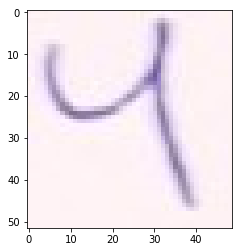

In [36]:
img = Image.open("data_examples\sample_4_1.jpg", "r")
plt.imshow(img)

Cette image est en couleur, mais nous avons entrainé nos modèles sur des images en niveaux de gris.
Il va donc faloir transformer cette image avant de pouvoir l'utiliser.

Heureusement, Pillow (alias PIL, renomé ici "Image") nous offre une methode <em>convert</em> pouvant prendre plusieurs modes de représentation de 'une image. L'un de ces modes corespond à notre besoin. C'est le mode "L", qui encode une image sur 8 bits par pixels, représentants la couleur en niveaux de gris.

Pour l'affichage, Plotlib à besoin que l'image soit un array, ainsi que d'indications sur la palette de couleurs à appliquer. <em>img.show()</em> fait cela tout seul, mais est moins indiqué pour un Notebook..

Voyons ce que cela donne :

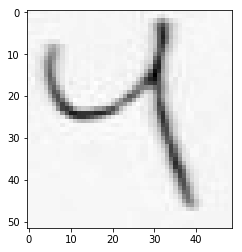

In [37]:
img = img.convert('L')
plt.imshow(np.asarray(img), cmap=plt.get_cmap('gray'))

Nous avons notre image en niveaux de gris.

Il ne reste plus qu'à la redimenssionner pour correspondre à nos 28 X 28 pixels...

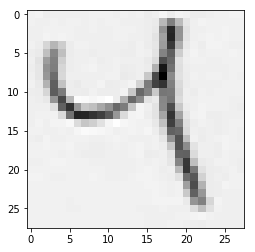

In [38]:
img = img.resize((28, 28), Image.ANTIALIAS)
plt.imshow(np.asarray(img), cmap=plt.get_cmap('gray'))

Malheureusement ce n'est pas tout. Les images fournis par MNIST database sont des chiffres blancs sur fond noir, ce qui est l'inverse de celui que nous avons ici.<br>Nous allons donc inverser la colorimetrie de l'image.

Pour cela nous devons importer un autre module de Pillow : <strong>ImageOps</strong> qui nous offre la méthode <em>invert</em> :

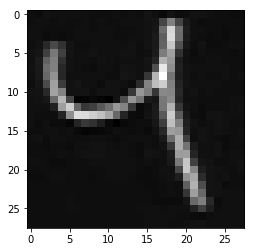

In [39]:
from PIL import ImageOps

img = ImageOps.invert(img)
plt.imshow(np.asarray(img), cmap=plt.get_cmap('gray'))

Puis à formater la matrice pour correspondre au format imposé dans <em>get_and_prepare_data_mnist</em> :

    Pas de imshow() ici car il ne sagit plus d'une image valide

In [40]:
#Convert to array
prepared =  np.array(img)
#Reshape
prepared = prepared.reshape(1, 1, 28,28).astype('float32')
#Normalize
prepared = prepared / 255

Il ne reste plus qu'à rassembler le code dans une fonction <strong>get_and_prepare_custom_data</strong> :

In [41]:
# This fonction prepare a picture for being processed by CNN
def get_and_prepare_custom_data(filename):
    #Opening in grayscale and resizing picture
    img = Image.open(filename, "r")\
        .convert('L').resize((28, 28), Image.ANTIALIAS)
    #Inverting color map
    img = ImageOps.invert(img)
    #Matrix formating
    prepared = np.asarray(img).reshape(1, 1, 28, 28).astype('float32')
    prepared = prepared / 255
    return prepared

#### VI) Evaluation d'une image

Maintenant que notre fonction de préparation des images est terminée, nous allons voir comment appliquer les prédictions de nos modèles.

Commençons donc par appeler notre fonction sur une image prise sur internet :

In [42]:
target = get_and_prepare_custom_data("data_examples\sample_3_1.jpg")

Puis demandons à l'un de nos modèles d'effectuer une prédiction dessus :

In [43]:
a = large_model_CNN.predict_classes(target)
print(a[0])

3


Bien entendu il peut être utile d'encapsuler ces lignes dans une fonction prenant en paramètre le chemin du fichier ainsi que le modèle à utiliser. Cela permetrait notament de fournir un affichage plus parlant que celui que nous venons d'avoir. 

Appelons cette fonction <strong>get_handwritten_digit_class</strong> :

In [44]:
from pathlib import Path

#Print and return prediction on an unprepared data with specified model
def get_handwritten_digit_class(filename, model):
    target = get_and_prepare_custom_data(filename)
    prediction = model.predict_classes(target)
    img = Image.open(filename, "r")
    plt.title(Path(filename).stem)
    plt.imshow(img)
    print(" The model classified the digit as being a " + str(prediction[0]))
    return prediction

Qui doit être executée de cette façon :

 The model classified the digit as being a 3


array([3], dtype=int64)

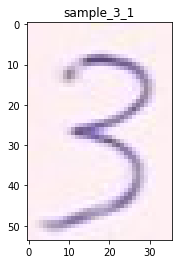

In [45]:
get_handwritten_digit_class("data_examples\sample_3_1.jpg", large_model_CNN)

Et maintenant nous allons améliorer l'affichage, permettre d'effectuer le test sur une liste d'images et rendre optionel l'affichage des resultas :

In [46]:
#Print and/or return multiples predictions on unprepared datas with specified model
def get_multiple_handwritten_digit_class(filenames, model, display=True):
    rows = len(filenames)
    if display :
        fig, axs = plt.subplots(rows, 3,figsize=(15,15))
    predictions = []
    for row, filename in enumerate(filenames) :
        target = get_and_prepare_custom_data(filename)
        predictions.append(model.predict_classes(target))
        if display :
            img = Image.open(filename, "r")
            arrow = Image.open("draws\\fleche.jpg", "r")
            axs[row, 0].set_axis_off()
            axs[row, 1].set_axis_off()
            axs[row, 2].set_axis_off()
            axs[row, 0].set_title(Path(filename).stem)
            axs[row, 0].imshow(img)
            axs[row, 1].imshow(arrow)
            axs[row, 2].text(0.5,0.5,'This is a\n' + str(predictions[row][0]), horizontalalignment='center',
             verticalalignment='center', fontsize=18, color='r')
    return predictions

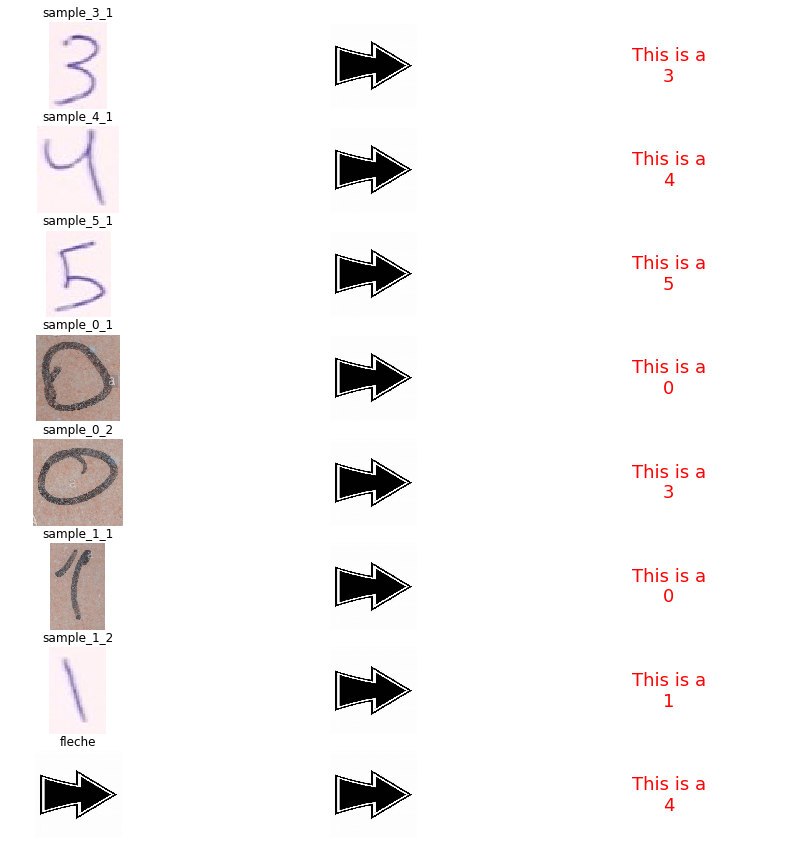

In [47]:
files = [
    "data_examples\sample_3_1.jpg",
     "data_examples\sample_4_1.jpg",
     "data_examples\sample_5_1.jpg",
     "data_examples\sample_0_1.jpg",
     "data_examples\sample_0_2.jpg",
     "data_examples\sample_1_1.jpg",
     "data_examples\sample_1_2.jpg", 
     "draws\\fleche.jpg"
        ]
predictions = get_multiple_handwritten_digit_class(files, large_model_CNN, display=True)

Comme nous pouvons le constater, et malgrès les resultats intéressants de nos modèles sur le dataset, la confrontation avec des images d'autres provenances n'est pas aussi concluante.

Nous pouvons aussi nous rendre compte que notre modèle ne couvre pas la possibilitée que l'image fournie ne représente pas un chiffre. (flèche en dernière ligne)

Nous nous interesseront dans les prochains chapitres à différentes manières d'améliorer nos prédictions sur des données moins formatées que celle offertes par le dataset MNIST.
Ainsi nous tenterons de nous affranchir des problématiques de background des images, de la couleur des chiffres et de son impact sur la qualité des prédictions, ..

Nous chercherons, par l'expérimentation, à déterminer s'il est possible de séléctionner une architecture plus efficace pour nos modèles.

Puis nous ajouterons une classification destinée à repérer les entrées non numériques, et ce faisant, éviter les classements erronées qui en découleraient.

# FIN TEMPORAIRE DU TUTORIEL
### La suite sera ajoutée au fur et a mesure de son evolution lorseque je l'estimerai présentable

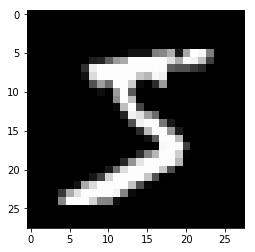

In [51]:
from keras.preprocessing.image import array_to_img
img = array_to_img(X_train[0])
# plt.imshow(img)
# img.show()

x = X_train[0].reshape(28,28).astype('float32')
plt.imshow(x, cmap=plt.get_cmap('gray'))

### I) Modifier le jeu de données

Il est temps de savoir faire quelques operations avec le jeu de données.

Je vous propose ces premières pistes :
- Nous allons enregistrer une image du dataset vers un format visualisable
- Nous allons afficher dans la console une image du dataset
- Nous allons convertir une image vers un array au format du dataset

Ce n'est qu'un début, mais c'est essentiel pour la suite du TP

#### a) Exporter une image depuis le dataset

Que ce soit pour modifier, visualiser l'image, ou pour toute autre operation, enregistrer une image issue du dataset vers un format d'image standard est une methode qui merite de figurer dans <strong>cnnutils.py</strong>


Pour cette convertion, nous utiliseront la methode <strong>fromarray</strong> de la bibliothèque <strong>PIL</strong>

voici le code :

In [52]:
# save an image from dataset to standard image file
def export_image_from_dataset(data, filename):
    im = Image.fromarray(data)
    # other solution, using only keras and not plt
    # keras.preprocessing.image.save_img(filename, data)
    # im = keras.preprocessing.image.load_img / img_to_array
    im.save(filename)

#### b) Afficher une image du dataset

Parfois on veut juste jetter un coup d'oeil sur l'image plutôt que la sauvegarder dans un fichier.

Pour afficher une image directement dans la console, ou avec l'application de visualisation par defaut :

In [53]:
# display and return image from array, [inline=true] show it on console
def plot_image_from_dataset(data, inline=False):
    #show it inline
    if inline:
        %matplotlib inline
    img = keras.preprocessing.image.array_to_img(data)
#     img.show()
    return img


#### c) Ajouter une image au dataset



### J) Quelques tentatives issues des modèles précédents

Parcequ'un modèle peut toujours s'améliorer et que c'est quand même ça le plus marrant, je propose de mixer les methodes que nous avons dejà vu et d'en modifier les paramètres.

C'est, selon moi, la meilleur façon d'apprendre sans passer par la preuve mathematique.

### K) Enrichissement du jeu de données

Parceque un bon modèle ne fait pas de miracle avec de mauvaises données. Parceque, comme nous, l'IA se fait une image du monde à partir de ce qu'elle à pu experimenter de ce monde. Il est bon de savoir comment enrichir son jeu de données, aussi grand que soit le jeu d'origine.

Nous allons voir quelques methodes applicables aux images que nous avons.